<a href="https://colab.research.google.com/github/bilalmuhammed111/Capstone_project-/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Optimizing a Drone's Flight Path Considering Wind, Motion, and Power Consumption

**Student Name:** Bilal Muhammed S

**Branch:** Robotics and Automation

**Semester:** 3  
**Subjects Applied:** Partial Differential Equations, Laplace Transforms, Inverse Laplace Transforms, Optimization Techniques

---

## Introduction

This project applies key mathematical techniques to simulate and optimize a drone’s flight in a wind-affected environment. It integrates:

- **PDEs** to simulate the wind field,
- **Laplace/ODE-based models** for drone dynamics,
- **Optimization** to reduce power usage and maintain stable flight.

We use Python, NumPy, SciPy, and Matplotlib to model the system and visualize results.


In [ ]:
# wind_field_simulation.py

import numpy as np

def simulate_wind_field(grid_size=50, diffusion=0.1, steps=100):
    wind = np.zeros((grid_size, grid_size))

    # Left boundary with vertical variation in wind
    wind[:, 0] = np.linspace(5, 15, grid_size)

    for _ in range(steps):
        laplace = (
            np.roll(wind, 1, axis=0) + np.roll(wind, -1, axis=0) +
            np.roll(wind, 1, axis=1) + np.roll(wind, -1, axis=1) - 4 * wind
        )
        wind += diffusion * laplace
    return wind


## Wind Field Simulation (PDE)

We simulate wind as a 2D field using the diffusion-based PDE:

$$
\frac{\partial W}{\partial t} = D \nabla^2 W
$$

Where:  
-  W  is wind speed,  
-  D  is the diffusion coefficient,  
- $ \nabla^2 $ is the Laplacian (second derivative).

The boundary (left side) starts with a wind profile from 5 to 15, and the field evolves via finite-difference updates.


In [ ]:
# drone_dynamics.py

import numpy as np
from scipy.integrate import odeint

def simulate_drone_response(time, force_input=1.0, mass=1.0, damping=0.5, stiffness=2.0, u_override=None):
    def drone_ode(y, t, u_func):
        x, v = y
        u = u_func(t)
        dxdt = v
        dvdt = (u - damping * v - stiffness * x) / mass
        return [dxdt, dvdt]

    if u_override is None:
        u_override = lambda t: force_input
    else:
        u_array = u_override
        u_override = lambda t: np.interp(t, time, u_array)

    y0 = [0, 0]
    sol = odeint(drone_ode, y0, time, args=(u_override,))
    return time, sol[:, 0]


## Drone Dynamics (Laplace-based System)

The drone is modeled as a second-order linear system:

$$
m \frac{d^2x}{dt^2} + b \frac{dx}{dt} + kx = u(t)
$$

Where:  
-  m : Mass of the drone  
-  b : Damping  
-  k : Stiffness  
-  u(t) : Applied force (control input)

We use `scipy.odeint` to simulate the system in time domain using initial conditions and the force input.


In [ ]:
# optimization_module.py

import numpy as np
from scipy.optimize import minimize

def cost_function(u, wind_profile, time):
    energy = np.sum(u**2)
    deviation = np.sum((u - wind_profile)**2)
    return 0.3 * energy + 0.7 * deviation

def optimize_path(wind_profile, time):
    initial_guess = np.zeros(len(time))
    bounds = [(-15, 15)] * len(time)

    result = minimize(
        cost_function, initial_guess,
        args=(wind_profile, time),
        bounds=bounds,
        method='SLSQP'
    )
    return result.x


## Path Optimization (Control Force Minimization)

The control force is optimized to reduce both energy and deviation due to wind:

$$
J(u) = \alpha \sum u(t)^2 + \beta \sum (u(t) - w(t))^2
$$

Where:  
-  u(t) : Control input  
-  w(t) : Wind force  
- $alpha, \beta $: Weighting constants (0.3 and 0.7)

We use the **SLSQP** method from `scipy.optimize.minimize()` with bounds on control force.


In [ ]:
# visualization_module.py

import matplotlib.pyplot as plt

def plot_wind_field(wind):
    plt.imshow(wind, cmap='viridis')
    plt.title("Wind Field (PDE Simulation)")
    plt.colorbar(label="Wind Speed")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

def plot_drone_paths(t, unoptimized, optimized):
    plt.plot(t, unoptimized, label="Unoptimized Path", linewidth=2)
    plt.plot(t, optimized, label="Optimized Path", linestyle="--", linewidth=2)
    plt.title("Drone Displacement Over Time")
    plt.xlabel("Time")
    plt.ylabel("Displacement")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_control_inputs(t, u):
    plt.plot(t, u, color="orange")
    plt.title("Optimized Control Input Over Time")
    plt.xlabel("Time")
    plt.ylabel("Force Applied")
    plt.grid(True)
    plt.show()


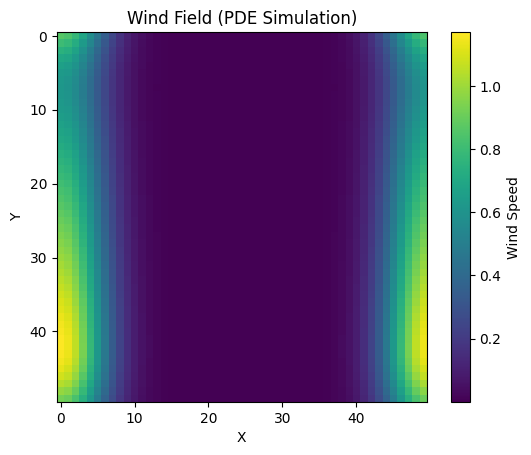

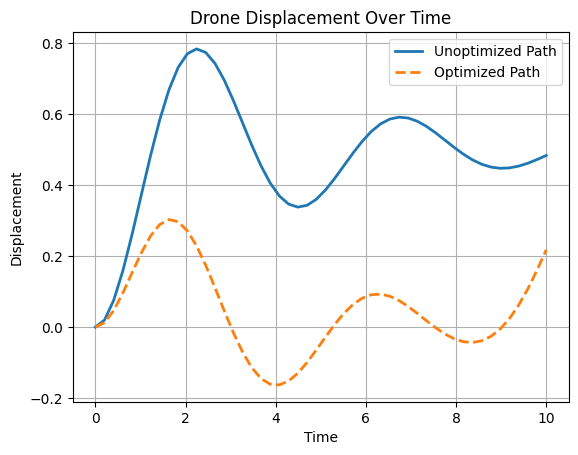

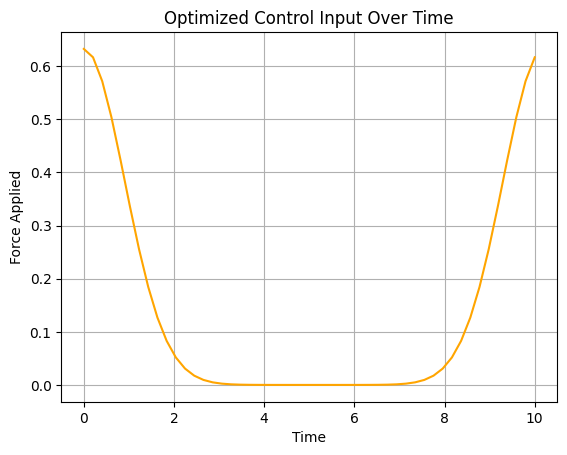

In [ ]:
# Run the full simulation

# Import everything
from matplotlib import pyplot as plt

# Step 1: Simulate wind field
wind = simulate_wind_field()
plot_wind_field(wind)

# Step 2: Extract wind profile
wind_profile = wind[wind.shape[0] // 2, :50]
time = np.linspace(0, 10, len(wind_profile))

# Step 3: Simulate unoptimized path
_, unoptimized_path = simulate_drone_response(time)

# Step 4: Optimize input
optimized_input = optimize_path(wind_profile, time)

# Step 5: Simulate optimized path
_, optimized_path = simulate_drone_response(time, u_override=optimized_input)

# Step 6: Plot results
plot_drone_paths(time, unoptimized_path, optimized_path)
plot_control_inputs(time, optimized_input)


## Results and Observations

### Wind Field
- Wind enters from the left boundary and diffuses over time.
- Vertical variation shows realistic turbulence.

### Drone Paths
- **Unoptimized path** shows basic damped motion.
- **Optimized path** is more stable due to smart control.

### Control Input
- Optimized force adapts based on wind profile.
- Energy is used more efficiently.

---

## Conclusion

This project combines PDE, Laplace-based modeling, and optimization to simulate and improve drone performance in wind.

It demonstrates how math tools from your syllabus can be applied in real-world robotics and automation systems.
